In [1]:
# 1 Load any real-world dataset (Kaggle recommended) into Python.
import csv

# File path
file_path = 'C:/Users/shres/OneDrive/Documents/iris.csv'

# Empty list to store data
data = []

# Open CSV and read
with open(file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    
    # Extract header (first row)
    header = next(csvreader)
    print("Header:", header)
    
    # Read the remaining rows
    for row in csvreader:
        data.append(row)

# Print first 5 rows
print("First 5 rows:")
for i in range(5):
    print(data[i])


Header: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
First 5 rows:
['1', '5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['2', '4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['3', '4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4', '4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5', '5.0', '3.6', '1.4', '0.2', 'Iris-setosa']


In [19]:
# 2 Apply PCA to reduce features to 2-dimensions.

import csv
import numpy as np


# 1. Load CSV dataset 
file_path = 'C:/Users/shres/OneDrive/Documents/iris.csv'
data = []
labels = []

with open(file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)  # skip header
    for row in csvreader:
        # Convert features to float and store label separately
        data.append([float(x) for x in row[:-1]])  # features
        labels.append(row[-1])  # label column

# Convert to numpy array
X = np.array(data)
y = np.array(labels)
print("Original shape:", X.shape)
original = np.round(X, 2)
print(original[:5])

# 2. Center the data
X_centered = X - np.mean(X, axis=0)

# 3. Compute covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# 4. Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 5. Select top 2 eigenvectors
top_indices = np.argsort(eigenvalues)[::-1][:2]
top_eigenvectors = eigenvectors[:, top_indices]

# 6. Project data to 2D
X_pca = X_centered.dot(top_eigenvectors)
print("PCA-transformed shape:", X_pca.shape)
X_pca_rounded = np.round(X_pca, 2)
print(X_pca_rounded[:5])

Original shape: (150, 5)
[[1.  5.1 3.5 1.4 0.2]
 [2.  4.9 3.  1.4 0.2]
 [3.  4.7 3.2 1.3 0.2]
 [4.  4.6 3.1 1.5 0.2]
 [5.  5.  3.6 1.4 0.2]]
PCA-transformed shape: (150, 2)
[[74.55  0.44]
 [73.55  0.31]
 [72.56  0.08]
 [71.55  0.16]
 [70.55  0.23]]


In [27]:
# 3 Apply K-Means clustering on the PCA-reduced data

import random

# Convert PCA-reduced data to list
X_pca_list = X_pca.tolist()

K = 3  # number of clusters
max_iterations = 10

# Initialize centroids randomly
centroids = random.sample(X_pca_list, K)

def euclidean_distance(a, b):
    return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5

def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        distances = [euclidean_distance(point, c) for c in centroids]
        min_index = distances.index(min(distances))
        clusters[min_index].append(point)
    return clusters

def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if len(cluster) == 0:
            new_centroids.append([0, 0])
            continue
        x_mean = sum([p[0] for p in cluster]) / len(cluster)
        y_mean = sum([p[1] for p in cluster]) / len(cluster)
        new_centroids.append([x_mean, y_mean])
    return new_centroids

# K-Means iterations
for i in range(max_iterations):
    clusters = assign_clusters(X_pca_list, centroids)
    new_centroids = update_centroids(clusters)
    if new_centroids == centroids:
        break
    centroids = new_centroids
    
for i, cluster in enumerate(clusters,start=1):
    print(f"\nCluster {i}:")
    for point in cluster:
        print(point)

print("Final centroids:", centroids)


Cluster 1:
[-23.442890235420226, -1.9672950357360008]
[-24.49160648284685, -0.7556402272552877]
[-25.58399632112024, 1.38924877287859]
[-26.536947444082013, 0.20323323777085955]
[-27.584473049685528, 1.5142055729058221]
[-28.557584793320807, 0.7493184567513934]
[-29.572537581731318, 1.0817789549602794]
[-30.613782460685933, 2.2148821391926345]
[-31.496445035207547, -0.991320785798696]
[-32.59285464905141, 1.6564432976750192]
[-33.567459850208344, 0.9139470390711554]
[-34.59086603425399, 1.5454516074164881]
[-35.5382882885131, 0.20316983531953875]
[-36.54362514304204, 0.2571584432528803]
[-37.5573566246649, 0.6298178308908673]
[-38.52394988904977, -0.3861757390351859]
[-39.53315984067482, -0.1883828457968868]
[-40.54448695707152, 0.19814072881876726]
[-41.54504633200275, 0.23516125936609247]
[-42.606716984870275, 1.8738197500706022]
[-43.619355899742146, 2.043402970417709]
[-44.51612795161522, -0.6168360659817274]
[-45.56130842937509, 0.5706785008728879]
[-46.510862898126355, -0.848057

In [29]:
# If labels exist, map cluster IDs to labels and compute accuracy manually.
# CLUSTERS (already obtained from K-Means) 

cluster_1 = [
    [-23.442890235420226, -1.9672950357360008],
    [-24.49160648284685, -0.7556402272552877],
    [-25.58399632112024, 1.38924877287859],
    [-26.536947444082013, 0.20323323777085955],
    [-27.584473049685528, 1.5142055729058221],
    [-28.557584793320807, 0.7493184567513934],
    [-29.572537581731318, 1.0817789549602794],
    [-30.613782460685933, 2.2148821391926345],
    [-31.496445035207547, -0.991320785798696],
    [-32.59285464905141, 1.6564432976750192],
    [-33.567459850208344, 0.9139470390711554],
    [-34.59086603425399, 1.5454516074164881],
    [-35.5382882885131, 0.20316983531953875],
    [-36.54362514304204, 0.2571584432528803],
    [-37.5573566246649, 0.6298178308908673],
    [-38.52394988904977, -0.3861757390351859],
    [-39.53315984067482, -0.1883828457968868],
    [-40.54448695707152, 0.19814072881876726],
    [-41.54504633200275, 0.23516125936609247],
    [-42.606716984870275, 1.8738197500706022],
    [-43.619355899742146, 2.043402970417709],
    [-44.51612795161522, -0.6168360659817274],
    [-45.56130842937509, 0.5706785008728879],
    [-46.510862898126355, -0.8480572051813938],
    [-47.60318218246467, 1.6295721724306824],
    [-48.515923658398606, -0.6376268134371742],
    [-49.55154697081814, 0.2517891535736987],
    [-50.56391594110093, 0.622945072012849],
    [-51.50797220611406, -0.8929382338055051],
    [-52.50852831671863, -0.9038467558334938],
    [-53.542375645462954, -0.13410652075238064],
    [-54.55090870881707, 0.2429449129976707],
    [-55.569055499907854, 0.6343057919515561],
    [-56.58337990676743, 1.1003062090678677],
    [-57.54048165479901, -0.2691299679326324],
    [-58.50927078679879, -0.9652975951706957],
    [-59.522802881218055, -0.7185289451589449],
    [-60.57433626326718, 0.6873688705182013],
    [-61.53642152035171, -0.43474717095601445],
    [-62.52504676535433, -0.6707714686249314],
    [-63.494026080918196, -1.483373662769281],
    [-64.53129431723302, -0.5037725675437781],
    [-65.53960094453818, -0.3953768588829323],
    [-66.5219658660352, -0.7762435822654368],
    [-67.50134166634402, -1.4660544658207788],
    [-68.54713606182438, -0.25071029110540005],
    [-69.54049727374888, -0.45116197208307923],
    [-70.51974095609604, -0.954230066857156],
    [-71.50190649038946, -1.4609875278658973],
    [-72.51053330630732, -1.218025448139895],
    [-73.51588741670169, -1.1650590104695298],
    [-74.49385860710457, -1.7339537353519898]
]

cluster_2 = [
    [26.5836898080066, -1.3347591647632695],
    [25.59065251786271, -1.600011023691603],
    [24.4265900414353, 2.3972423253406556],
    [23.441240766282842, 1.9232933330407862],
    [22.420548874254795, 2.4601876293347593],
    [21.47277738667333, 0.9436133318899054],
    [20.43730985968542, 1.93881630991771],
    [19.455847676618234, 1.3647373133912557],
    [18.438598270534488, 1.8610972597248965],
    [17.514667525123585, -0.17649695237929058],
    [16.44297399124223, 1.7682245279409734],
    [15.485676003284953, 0.4906301931147154],
    [14.50715292802945, -0.07873726691409728],
    [13.466711681518136, 1.025275630673965],
    [12.478106956707572, 0.7423444506927087],
    [11.448981603346402, 1.427560846244294],
    [10.497679254496612, 0.20724621891311604],
    [9.454068258665021, 1.3930188080483414],
    [8.464400105044987, 0.9201165199466077],
    [7.483580412116252, 0.5146485080425501],
    [6.4547688357632325, 1.1472764805562907],
    [5.492843097278254, 0.20071364321350785],
    [4.449079580341697, 1.2327701687564865],
    [3.482197964088757, 0.49985450980343404],
    [2.4437320884562372, 1.3583009378355015],
    [1.460428741568066, 0.9662489116979175],
    [0.47035155171962334, 0.7712200108847853],
    [-0.5362783149456338, 0.937942131238849],
    [-1.553269565284569, 1.328038049514451],
    [-2.562148597634397, 1.4828679053412839],
    [-3.5310384796925027, 0.6307737835399855],
    [-4.483527151307438, -0.5152770887644427],
    [-5.493051352232329, -0.37731407641819603],
    [-6.487019484382742, -0.5280990089959251],
    [-7.499385190338883, -0.20487214313208937],
    [-8.550571569027476, 0.9514546282635724],
    [-9.517236538761003, 0.08839346018734288],
    [-10.52455576166333, 0.36611139713749263],
    [-11.540025450903931, 0.8125618046558764],
    [-12.522956838132767, 0.28373297648214896],
    [-13.499000106195112, -0.36021344706423797],
    [-14.495165632983452, -0.5251010751401866],
    [-15.50665553230637, -0.26620165208065144],
    [-16.52272187995163, 0.20382359180155396],
    [-17.494681230112956, -0.5282795895791613],
    [-18.45583132613299, -1.5912812757229837],
    [-19.4985632510047, -0.5177651819673744],
    [-20.49629079338545, -0.5413784460949312],
    [-21.497398788842627, -0.5527597032692734],
    [-22.506942924069538, -0.2640747200441921]
]

cluster_3 = [
    [74.54752686625312, 0.44142550093756],
    [73.54914342463479, 0.30934205967572964],
    [72.55712047069034, 0.0845275986970506],
    [71.55179061365597, 0.16035334716957814],
    [70.55276306164434, 0.22763645492355697],
    [69.53544788952476, 0.6825325511498135],
    [68.55758991714634, -0.02069003627724884],
    [67.55099130133566, 0.19072853541816445],
    [66.56165465288089, -0.22132170152853894],
    [65.55448363202554, 0.03653101733285967],
    [64.54932355541199, 0.2618180579006934],
    [63.553612896585854, 0.01124286352236267],
    [62.56164171368805, -0.21578202842730534],
    [61.5800900971151, -0.7503690972968102],
    [60.55927531458179, 0.04548312038447119],
    [59.54918570610683, 0.2517174204358897],
    [58.55933542114862, -0.09427195977663058],
    [57.56071049376082, -0.22288429128394324],
    [56.543823257806864, 0.27520906897958053],
    [55.56005372640392, -0.2265738130758068],
    [54.54965045451916, 0.02364569465005625],
    [53.55981416455012, -0.2786694044840909],
    [52.588192731158586, -1.031898482737088],
    [51.55121716576982, -0.16179401680358868],
    [50.55415146193949, -0.27133335575408074],
    [49.56145267445544, -0.45389602298819837],
    [48.56074836180388, -0.4449393269274366],
    [47.56602510738058, -0.5261922930164644],
    [46.57008054616963, -0.6476441485345934],
    [45.569817106491094, -0.7680492998545863],
    [44.56892307911672, -0.757831925010295],
    [43.56321111765057, -0.5330176195888139],
    [42.57432713101308, -0.7665929777661902],
    [41.573498869674516, -0.7149117528145146],
    [40.57619447210969, -0.9813273385157006],
    [39.58526514309797, -1.1929845742888654],
    [38.57691106380414, -0.9087971529760321],
    [37.57879977291979, -1.1034703412175277],
    [36.59168803678959, -1.5264876244391632],
    [35.577415400976655, -1.0626976382938413],
    [34.585633932801656, -1.2909832090270388],
    [33.588571021006274, -1.5608699044827434],
    [32.5959551418251, -1.6923433359830984],
    [31.57274893087309, -1.0829144166975053],
    [30.565850060751735, -0.887651444815772],
    [29.587140535100076, -1.5036872786363695],
    [28.581497486947615, -1.2714580185594997],
    [27.593982068011808, -1.7148132550162396]
]

clusters = [cluster_1, cluster_2, cluster_3]

# TRUE LABELS (EDIT IF NEEDED)
true_labels = (
    [0] * len(cluster_1) +
    [1] * len(cluster_2) +
    [2] * len(cluster_3)
)

# MAP CLUSTERS TO LABELS
cluster_label_map = {}
index = 0

for cid, cluster in enumerate(clusters):
    count = {}
    for _ in cluster:
        label = true_labels[index]
        count[label] = count.get(label, 0) + 1
        index += 1
    cluster_label_map[cid] = max(count, key=count.get)

# CALCULATE ACCURACY 
correct = 0
index = 0

for cid, cluster in enumerate(clusters):
    predicted_label = cluster_label_map[cid]
    for _ in cluster:
        if predicted_label == true_labels[index]:
            correct += 1
        index += 1

accuracy = correct / len(true_labels)

print("Cluster  Label Mapping:", cluster_label_map)
print("Accuracy:", accuracy)


Cluster  Label Mapping: {0: 0, 1: 1, 2: 2}
Accuracy: 1.0


Data loaded. Total samples: 150 Features: 5
PCA done. Reduced to 2D.
K-Means done. Clusters assigned.
Cluster Label Mapping: {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
Accuracy: 0.9933333333333333


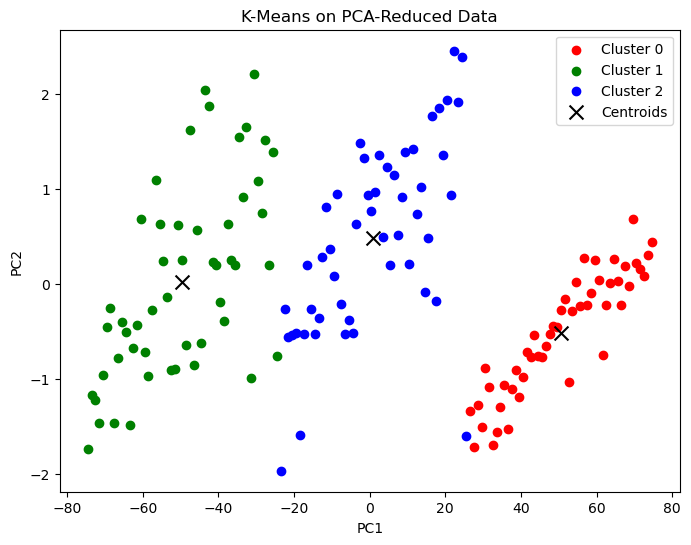

In [41]:
# 5 Write a function run_pipeline() that:
#• loads data
#• runs PCA
#• runs K-Means
#• plots results

import csv
import numpy as np
import random
import matplotlib.pyplot as plt

def run_pipeline(file_path, K=3, max_iter=10):
   
    # Step 1: Load data
    X = []
    y = []
    with open(file_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)  # skip header
        for row in csvreader:
            X.append([float(x) for x in row[:-1]])  # features
            y.append(row[-1])  # labels

    print("Data loaded. Total samples:", len(X), "Features:", len(X[0]))
  
    true_labels = y  

    # Step 2: PCA (2D)
    X = np.array(X)
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    top_indices = np.argsort(eigenvalues)[::-1][:2]
    top_eigenvectors = eigenvectors[:, top_indices]
    X_pca = X_centered.dot(top_eigenvectors)
    X_pca_list = X_pca.tolist()
    print("PCA done. Reduced to 2D.")

    # Step 3: K-Means 
    centroids = random.sample(X_pca_list, K)

    def euclidean_distance(a, b):
        return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5

    def assign_clusters(data, centroids):
        clusters = [[] for _ in range(len(centroids))]
        for point in data:
            distances = [euclidean_distance(point, c) for c in centroids]
            min_index = distances.index(min(distances))
            clusters[min_index].append(point)
        return clusters

    def update_centroids(clusters):
        new_centroids = []
        for cluster in clusters:
            if len(cluster) == 0:
                continue
            x_mean = sum([p[0] for p in cluster]) / len(cluster)
            y_mean = sum([p[1] for p in cluster]) / len(cluster)
            new_centroids.append([x_mean, y_mean])
        return new_centroids

    for i in range(max_iter):
        clusters = assign_clusters(X_pca_list, centroids)
        new_centroids = update_centroids(clusters)
        if new_centroids == centroids:
            break
        centroids = new_centroids

    print("K-Means done. Clusters assigned.")

    # Step 4: MAP CLUSTERS TO LABELS & CALCULATE ACCURACY 
    cluster_label_map = {}
    index = 0

    for cid, cluster in enumerate(clusters):
        count = {}
        for _ in cluster:
            label = true_labels[index]
            count[label] = count.get(label, 0) + 1
            index += 1
        cluster_label_map[cid] = max(count, key=count.get)

    # CALCULATE ACCURACY 
    correct = 0
    index = 0

    for cid, cluster in enumerate(clusters):
        predicted_label = cluster_label_map[cid]
        for _ in cluster:
            if predicted_label == true_labels[index]:
                correct += 1
            index += 1

    accuracy = correct / len(true_labels)
    print("Cluster Label Mapping:", cluster_label_map)
    print("Accuracy:", accuracy)

    # Step 5: Plot clusters
    colors = ['red', 'green', 'blue', 'purple', 'orange']
    plt.figure(figsize=(8,6))
    for cluster_id, cluster in enumerate(clusters):
        x_vals = [p[0] for p in cluster]
        y_vals = [p[1] for p in cluster]
        plt.scatter(x_vals, y_vals, color=colors[cluster_id % len(colors)], label=f'Cluster {cluster_id}')

    cent_x = [c[0] for c in centroids]
    cent_y = [c[1] for c in centroids]
    plt.scatter(cent_x, cent_y, color='black', marker='x', s=100, label='Centroids')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('K-Means on PCA-Reduced Data')
    plt.legend()
    plt.show()


# Run the pipeline
run_pipeline('C:/Users/shres/OneDrive/Documents/iris.csv', K=3, max_iter=20)

